In [65]:
from wearsed.dataset.WearSEDDataset import WearSEDDataset

import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import torch

In [3]:
SIGNAL = 'Pleth'
FREQ = 256

dataset = WearSEDDataset(mesaid_path='../wearsed/dataset/data_ids/', signals_to_read=[SIGNAL])

# Data point
r1 = dataset[1]
signal = r1.psg[SIGNAL]

In [23]:
def show_seconds(ts):
    fig, ax = plt.subplots(1, 1, figsize=(20, 5))
    start, end = ts-10*FREQ, ts+10*FREQ
    signal[start:end].plot(ax=ax)
    ax.vlines(list(range(start, end, FREQ)), ymin=-1.5, ymax=1.5, colors='grey')
    plt.show()

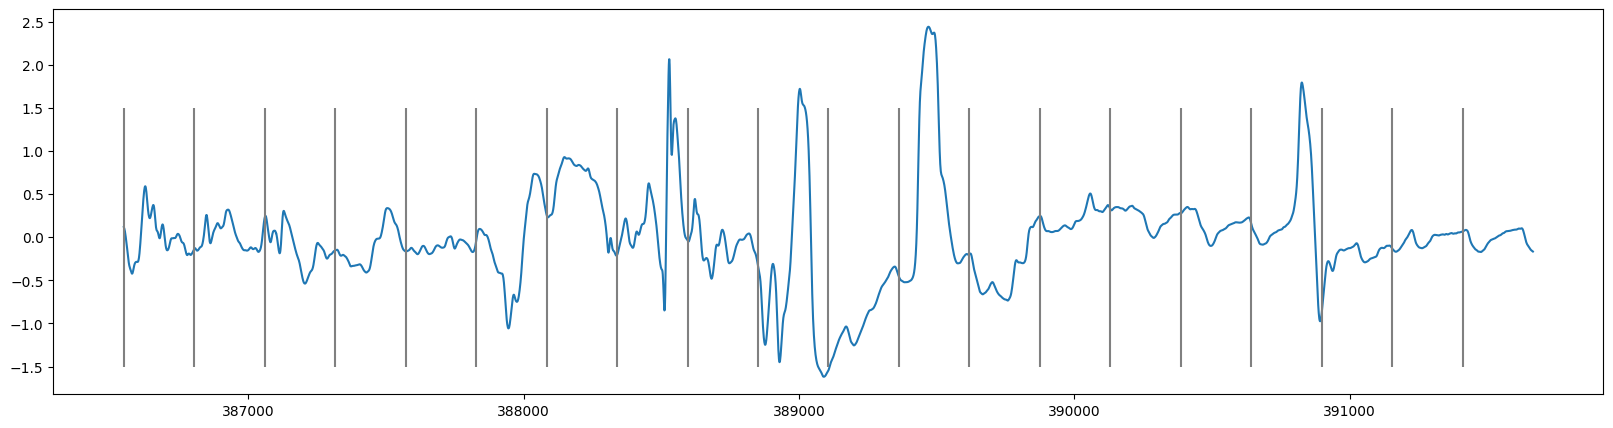

In [24]:
show_seconds(len(signal)//20)

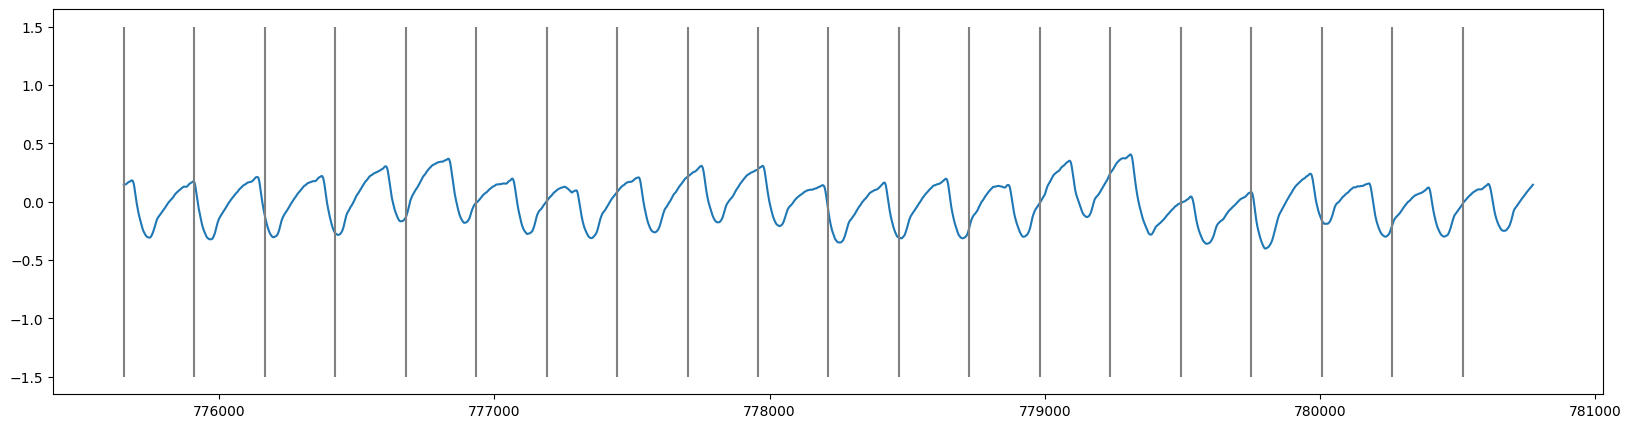

In [25]:
show_seconds(len(signal)//10)

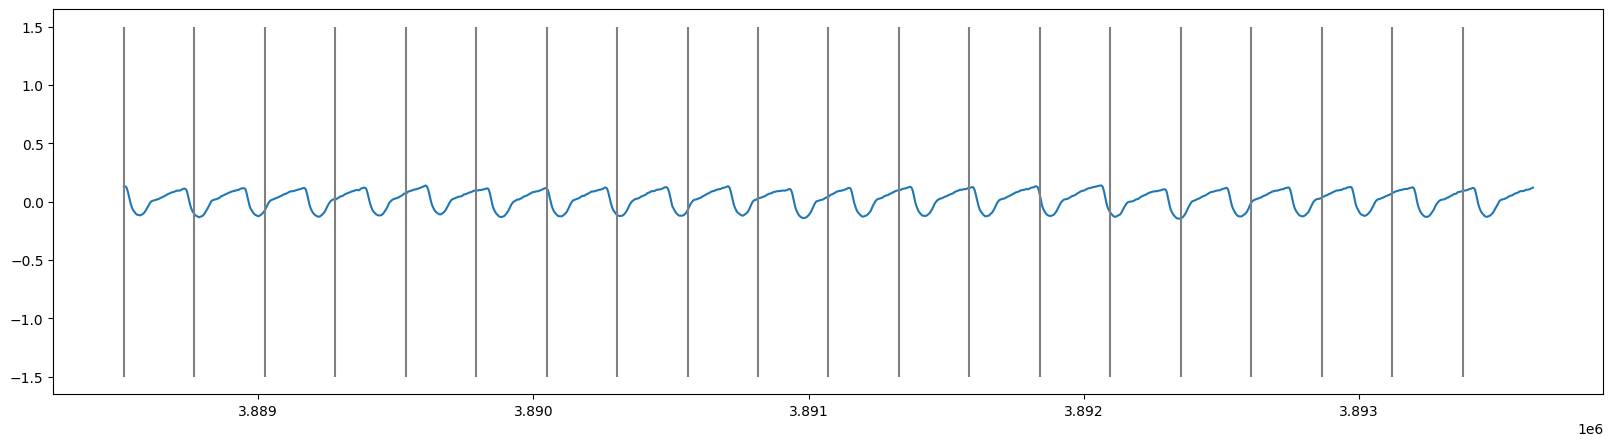

In [26]:
show_seconds(len(signal)//2)

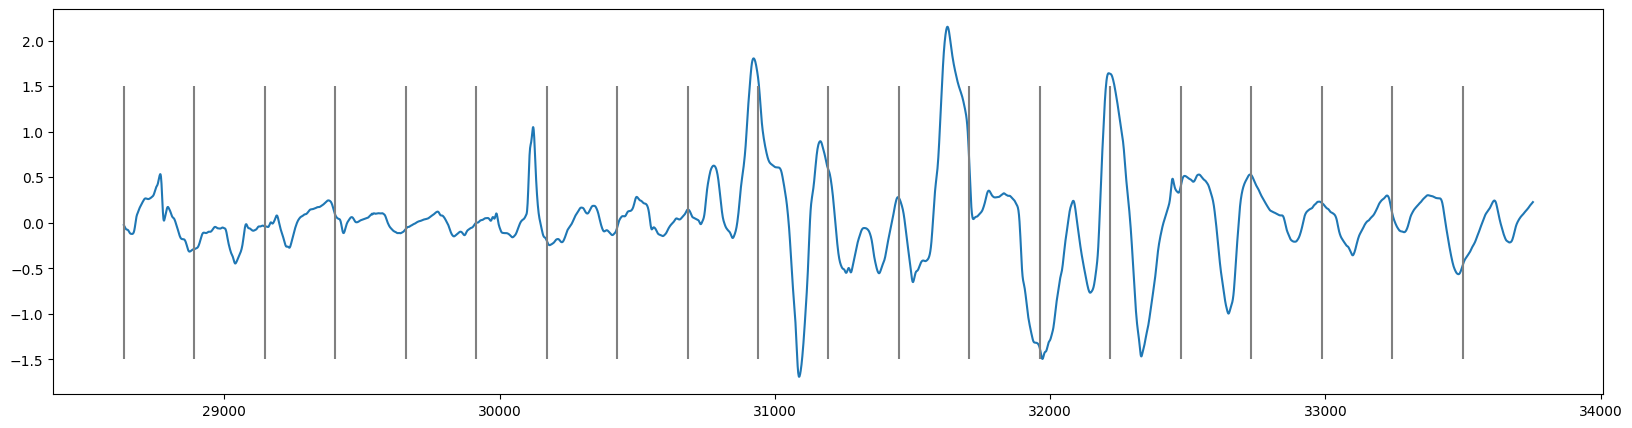

In [47]:
show_seconds(31195)

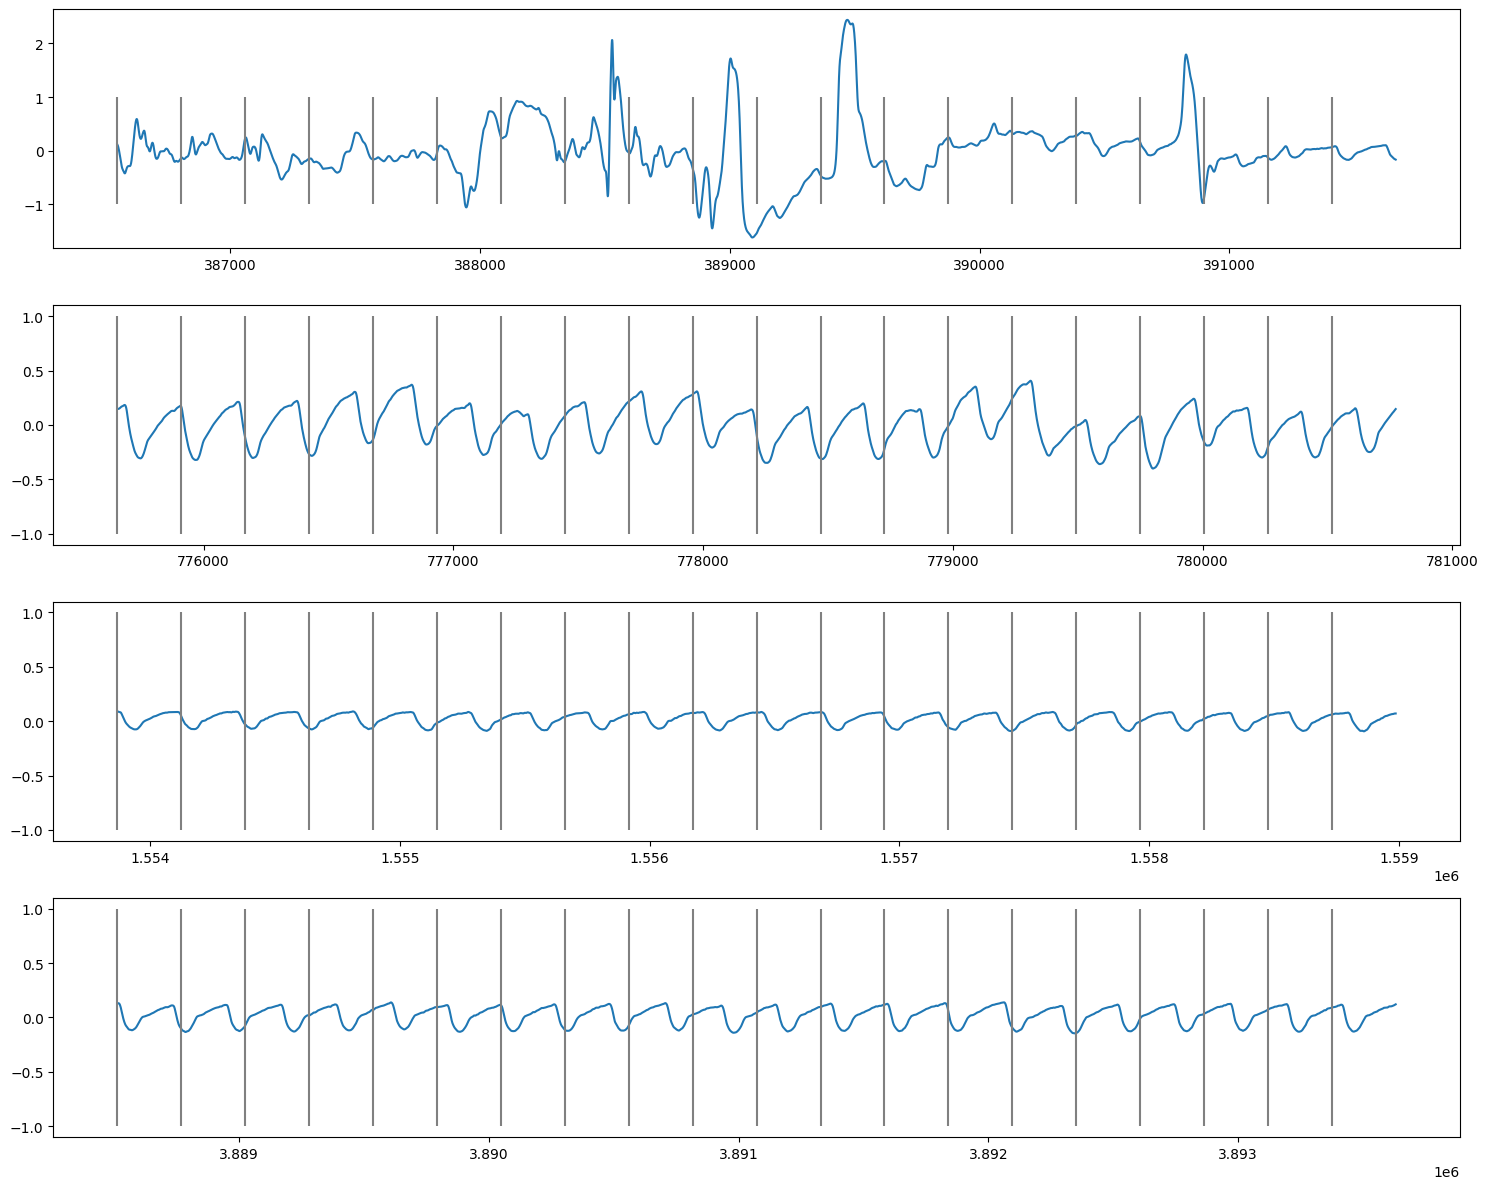

In [34]:
ts_list = [20, 10, 5, 2]

fig, axs = plt.subplots(4, 1, figsize=(15, 4*3))
for i, ts in enumerate(ts_list):
    start, end = len(signal)//ts-10*FREQ, len(signal)//ts+10*FREQ
    signal[start:end].plot(ax=axs[i])
    axs[i].vlines(list(range(start, end, FREQ)), ymin=-1.0, ymax=1.0, colors='grey')
plt.tight_layout()
plt.show()

## Preprocessing - Mean, Std, Min, Max, Shakiness

### Mean, Std, Min, Max

In [80]:
list_mean = []
list_std  = []
list_min  = []
list_max  = []

for sec_idx in tqdm(range(len(signal)//FREQ)):
    second = signal[sec_idx*FREQ:sec_idx*FREQ+FREQ]
    list_mean.append(second.mean())
    list_std.append(second.std())
    list_min.append(second.min())
    list_max.append(second.max())

100%|██████████| 30399/30399 [00:04<00:00, 7204.82it/s]


  0%|          | 0/30399 [00:00<?, ?it/s]

100%|██████████| 30399/30399 [00:04<00:00, 6211.16it/s]


<Axes: >

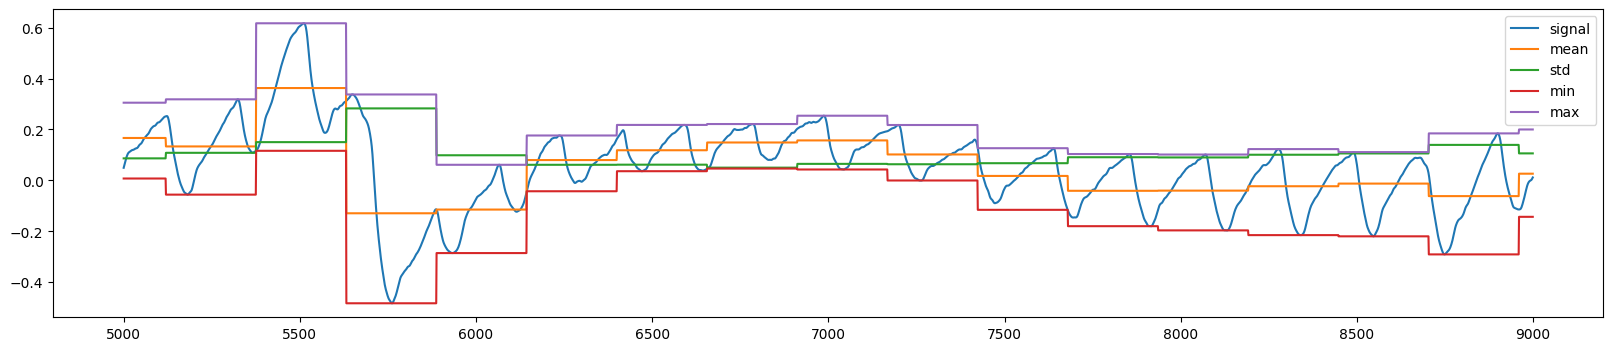

In [91]:
# Example for show how the values work

list_mean = []
list_std  = []
list_min  = []
list_max  = []

for sec_idx in tqdm(range(len(signal)//FREQ)):
    second = signal[sec_idx*FREQ:sec_idx*FREQ+FREQ]
    list_mean += [second.mean()]*FREQ
    list_std  += [second.std()]*FREQ
    list_min  += [second.min()]*FREQ
    list_max  += [second.max()]*FREQ

df = pd.DataFrame({
    'signal': signal,
    'mean': list_mean,
    'std': list_std,
    'min': list_min,
    'max': list_max,
})
df[5000:9000].plot(figsize=(20, 4))

### Shakiness

In [ ]:
shake = []

for sec in tqdm(range(len(signal)//FREQ)):
    cur_shake = 0
    last_direc = False
    last_point = signal[sec*FREQ]
    for i in range(1, FREQ):
        cur_point = signal[sec*FREQ+i]
        cur_direc = cur_point > last_point  # True = Signal goes Up, False = Signal goes Down
        if last_direc != cur_direc:
            cur_shake += 1
            last_direc = cur_direc
        last_point = cur_point
    shake.append(cur_shake)

100%|██████████| 30399/30399 [00:29<00:00, 1033.69it/s]


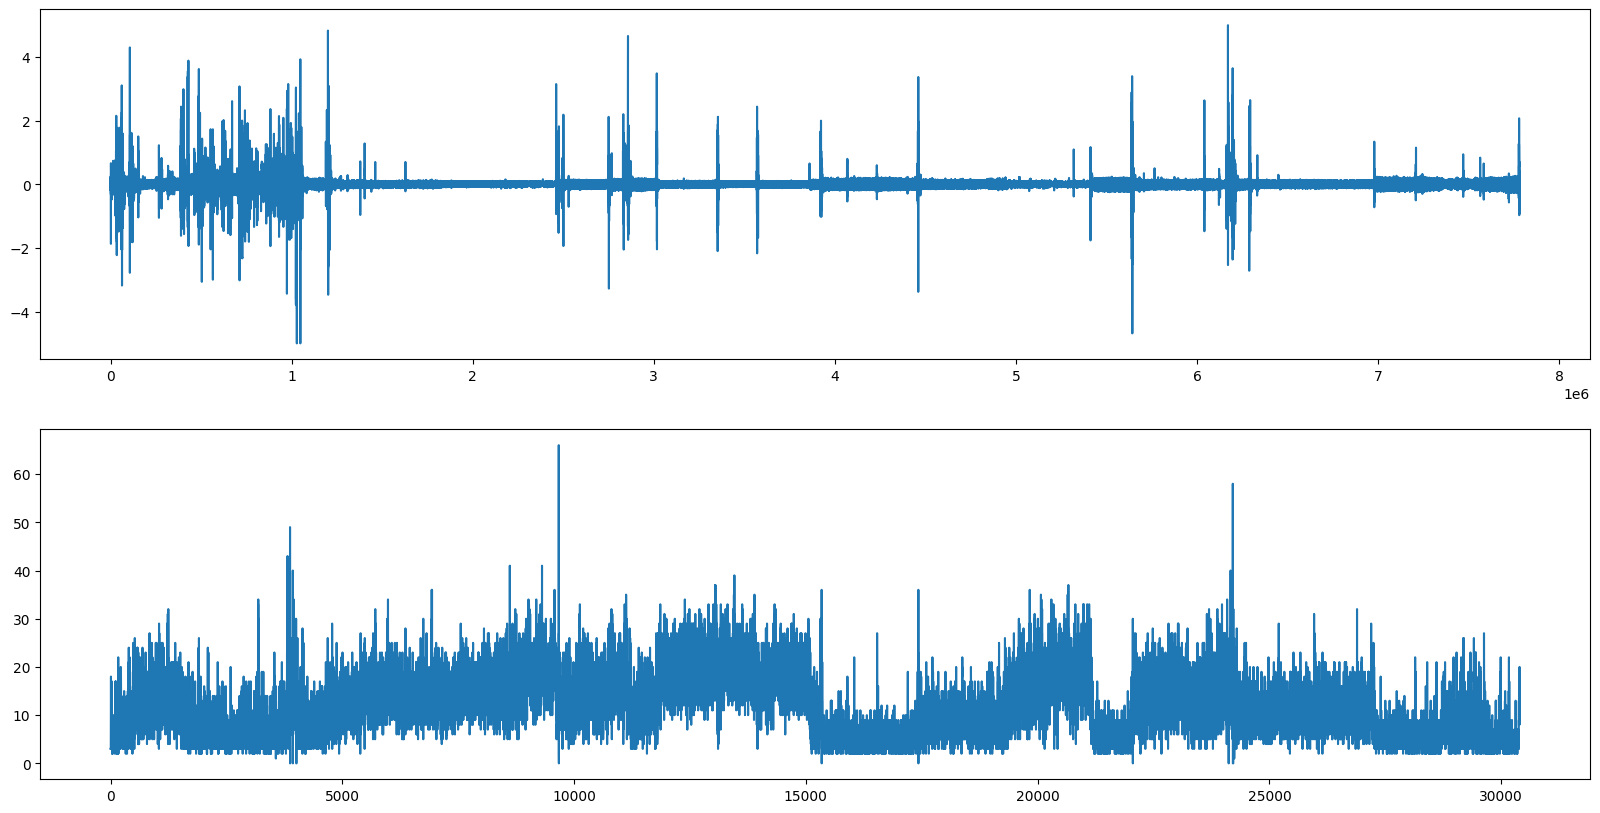

In [56]:
fig, axs = plt.subplots(2, 1, figsize=(20, 5*2))
signal.plot(ax=axs[0])
pd.Series(shake).plot(ax=axs[1])
plt.show()

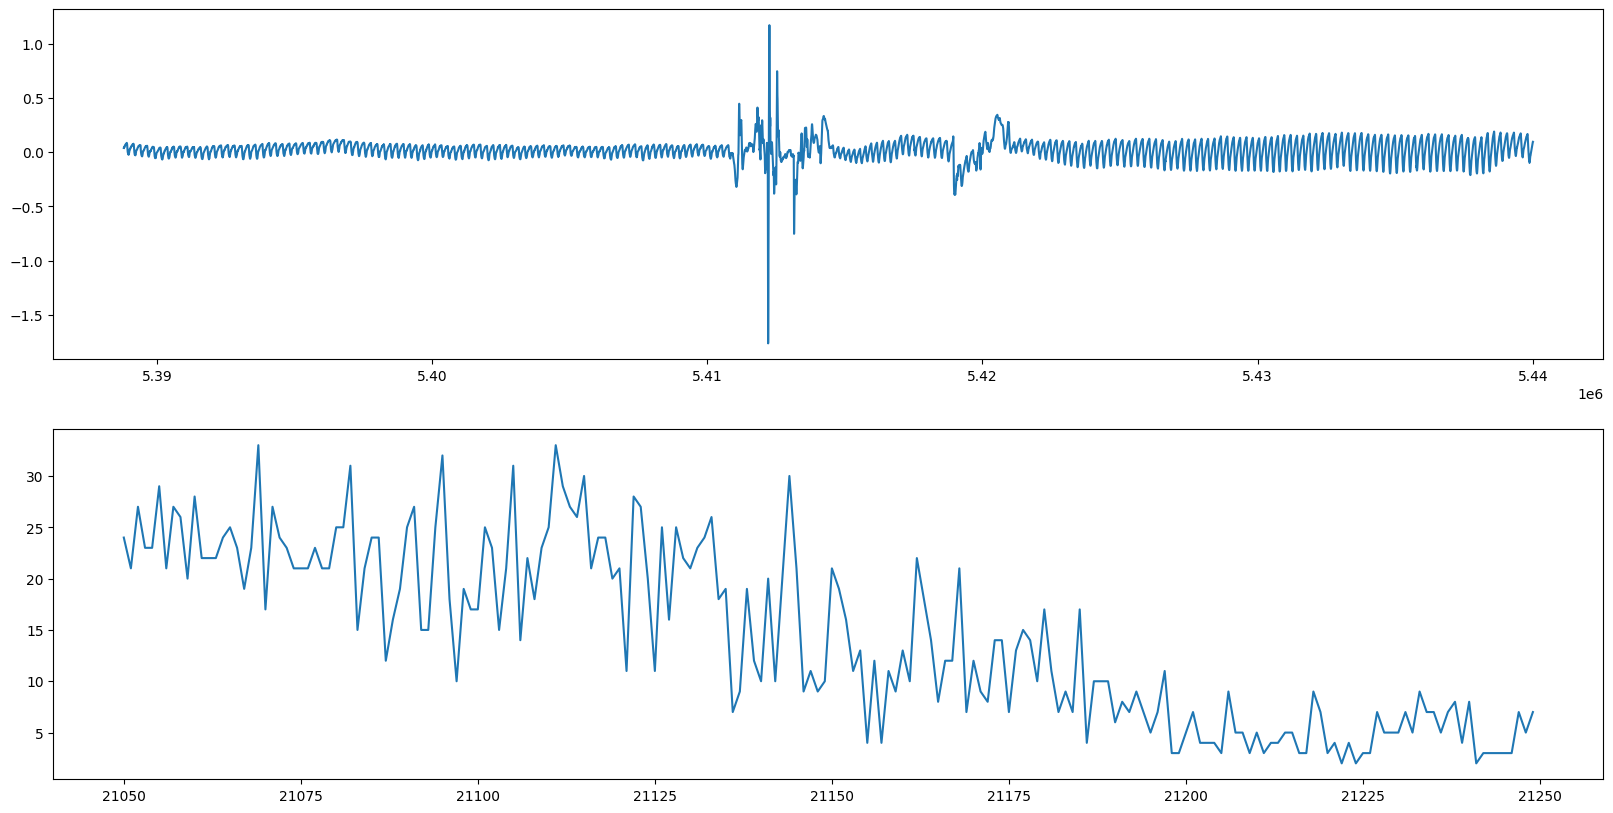

In [60]:
fig, axs = plt.subplots(2, 1, figsize=(20, 5*2))
signal[21050*FREQ:21250*FREQ].plot(ax=axs[0])
pd.Series(shake)[21050:21250].plot(ax=axs[1])
plt.show()

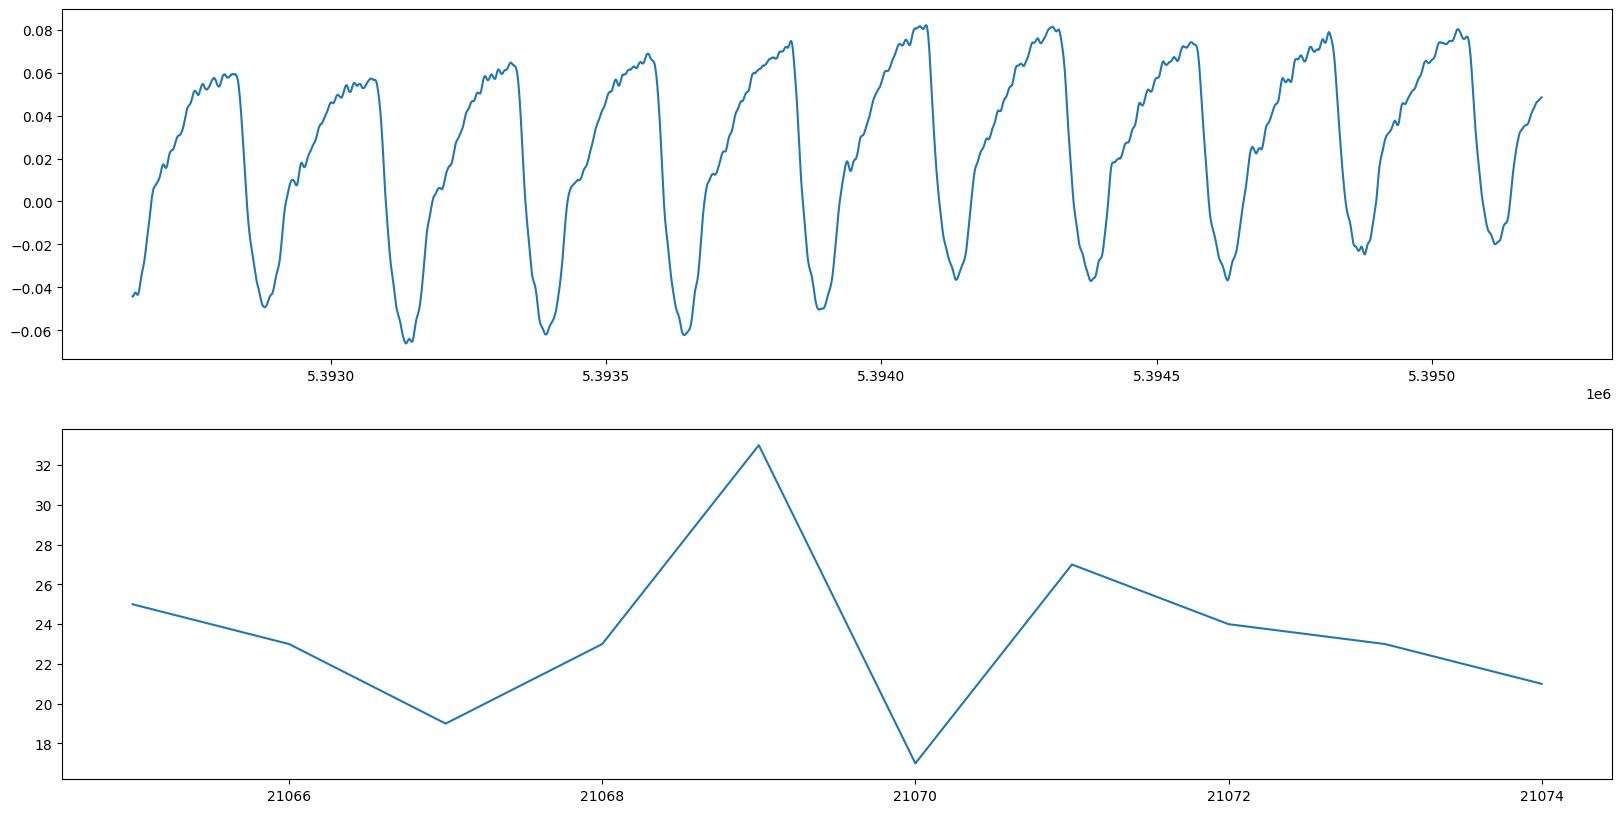

In [62]:
fig, axs = plt.subplots(2, 1, figsize=(20, 5*2))
signal[21065*FREQ:21075*FREQ].plot(ax=axs[0])
pd.Series(shake)[21065:21075].plot(ax=axs[1])
plt.show()

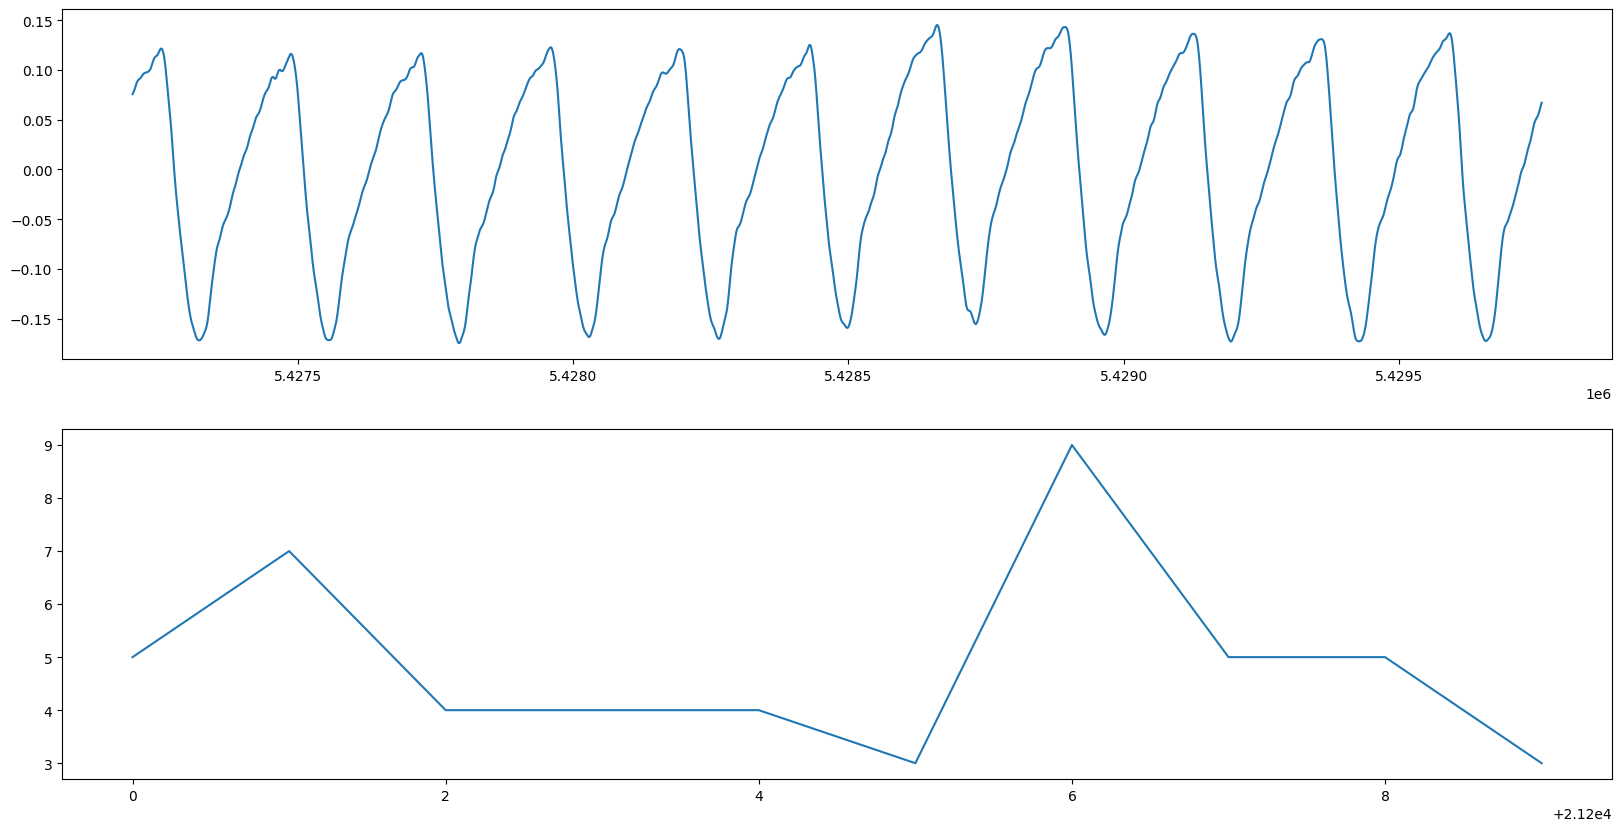

In [63]:
fig, axs = plt.subplots(2, 1, figsize=(20, 5*2))
signal[21200*FREQ:21210*FREQ].plot(ax=axs[0])
pd.Series(shake)[21200:21210].plot(ax=axs[1])
plt.show()